In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()


In [4]:
raw_csv_data = pd.read_csv("Index2018.csv")
df_comp = raw_csv_data.copy()
df_comp['date'] = pd.to_datetime(df_comp['date'], dayfirst=True)
df_comp.set_index("date", inplace=True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.ffill()


In [5]:
df_comp['market_value'] = df_comp.spx

In [6]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]


In [8]:
wn = np.random.normal(loc= df.market_value.mean(), scale = df.market_value.std(), size = len(df))

In [9]:
df['wn']= wn

C:\Users\user\AppData\Local\Temp\ipykernel_15316\3745777653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wn']= wn


In [10]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1093.350468
std,292.559287,293.909227
min,438.920000,-9.832984
25%,914.620000,896.775228
50%,1144.650000,1096.563478
75%,1316.280729,1290.053372
max,1570.252238,2093.957028


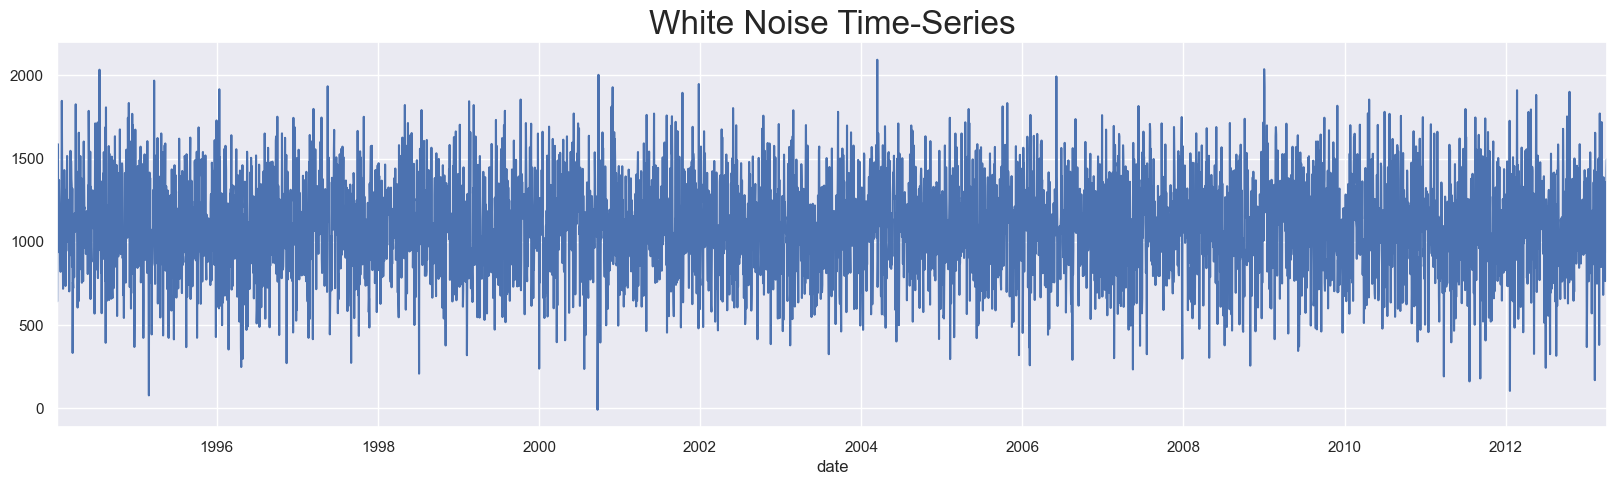

In [14]:
df.wn.plot(figsize=(20, 5))
plt.title("White Noise Time-Series", size=24)
plt.show()



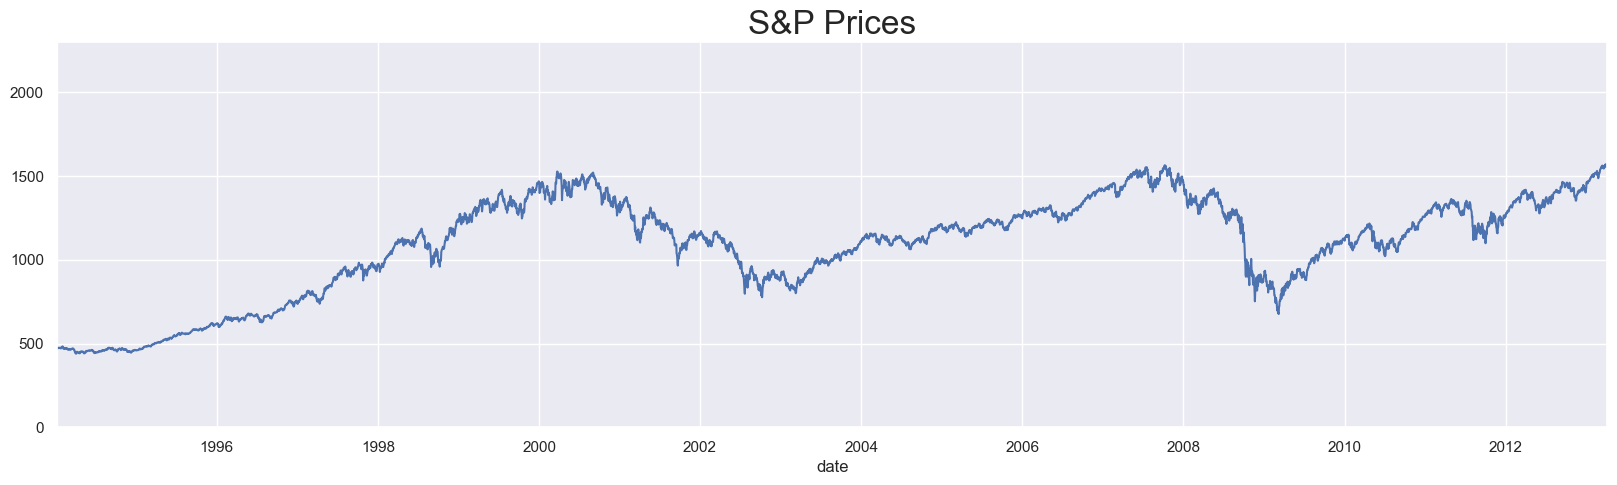

In [15]:
df.market_value.plot(figsize=(20,5))
plt.title("S&P Prices", size = 24)
plt.ylim(0, 2300)
plt.show()

In [18]:
 rw = pd.read_csv("Randwalk.csv")
 rw.date = pd.to_datetime(rw.date, dayfirst=True)
 rw.set_index("date", inplace=True)
 rw = rw.asfreq('b')

In [19]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [21]:
df = df.copy()
df.loc[:, 'rw'] = rw['price']

In [22]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,641.794544,1122.139662
1994-01-10,475.27,1446.674450,1080.347860
1994-01-11,474.13,1587.090541,1082.095245
1994-01-12,474.17,964.103389,1083.639265
1994-01-13,472.47,1118.241054,1067.146255


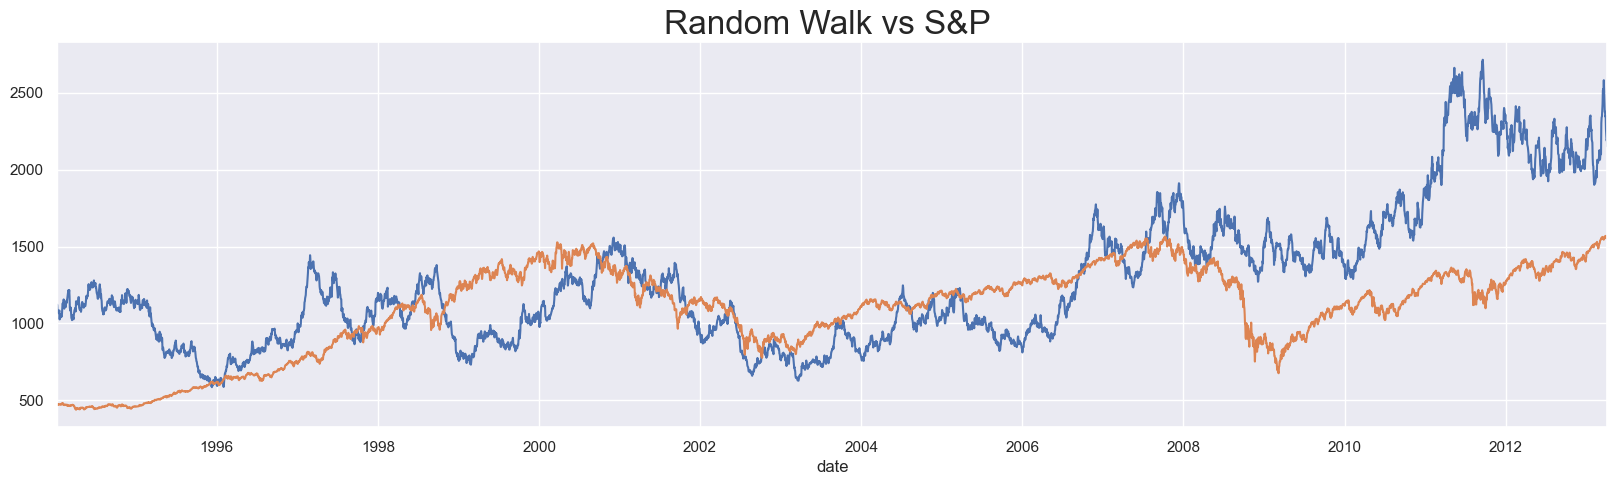

In [26]:
df.rw.plot(figsize = (20, 5))
df.market_value.plot()
plt.title("Random Walk vs S&P " , size = 24)
plt.show()

In [27]:
sts.adfuller(df.market_value)

(-1.7369847452352447,
 0.4121645696770616,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [28]:
sts.adfuller(df.wn)

(-70.94065275382201,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70861.23972245978)

In [29]:
sts.adfuller(df.rw)

(-1.3286073927689719,
 0.6159849181617385,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

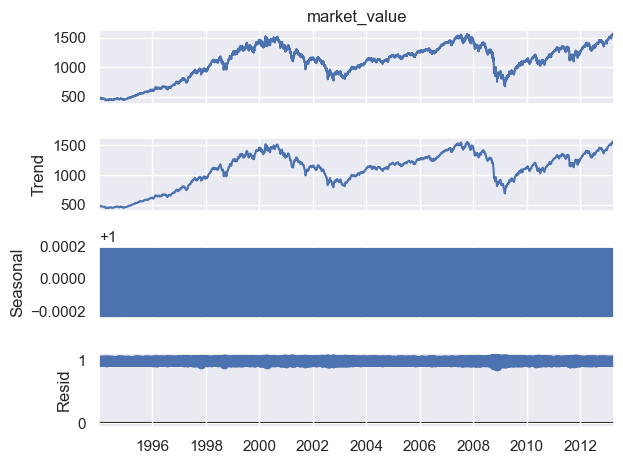

In [32]:
s_dec_multiplicative = seasonal_decompose(df.market_value, model="multiplicative")
s_dec_multiplicative.plot()
plt.show()

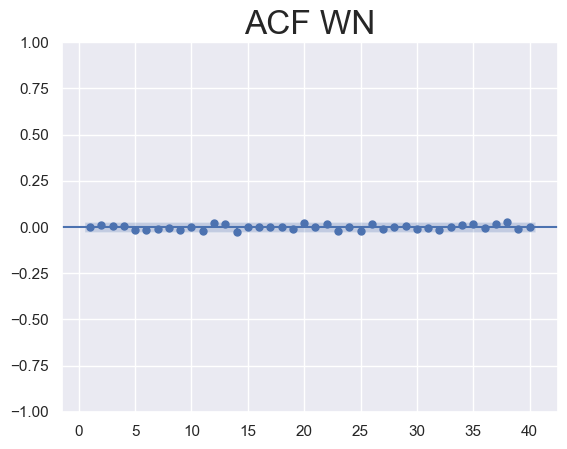

In [35]:
sgt.plot_acf(df.wn , lags = 40,zero = False )
plt.title("ACF WN" , size = 24)
plt.show()

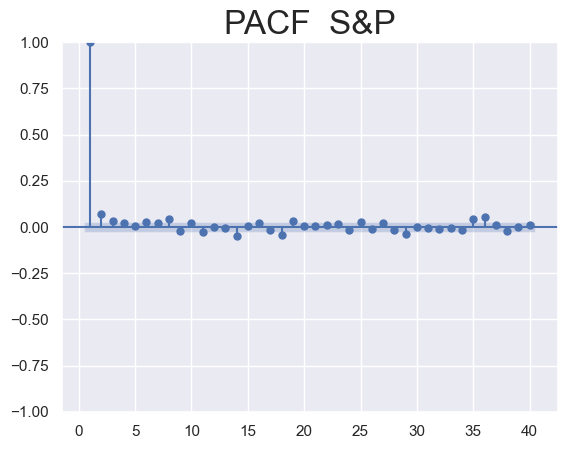

In [42]:
sgt.plot_pacf(df.market_value , lags = 40,zero = False , method = ('ols' ))
plt.title("PACF  S&P" , size = 24)
plt.show()

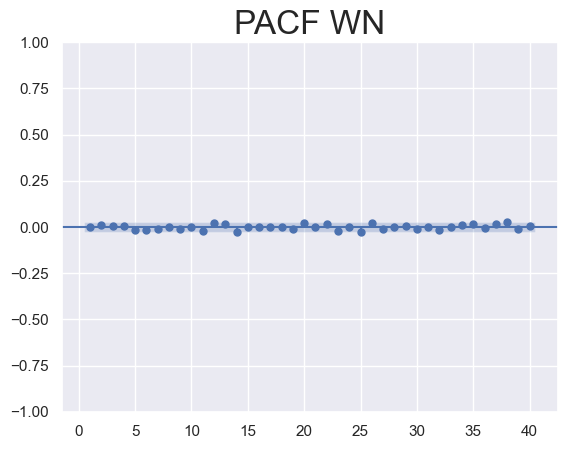

In [48]:
sgt.plot_pacf(df.wn, lags=40, zero=False, method=('ols'))
plt.title("PACF WN", size=24)
plt.show()

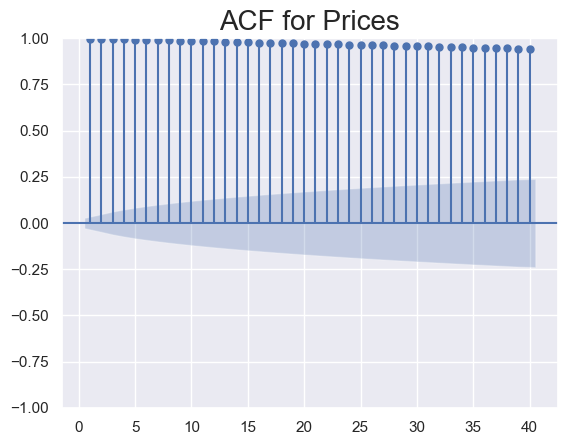

In [47]:
sgt.plot_acf(df.market_value ,zero = False, lags = 40 )
plt.title("ACF for Prices" , size = 20)
plt.show()

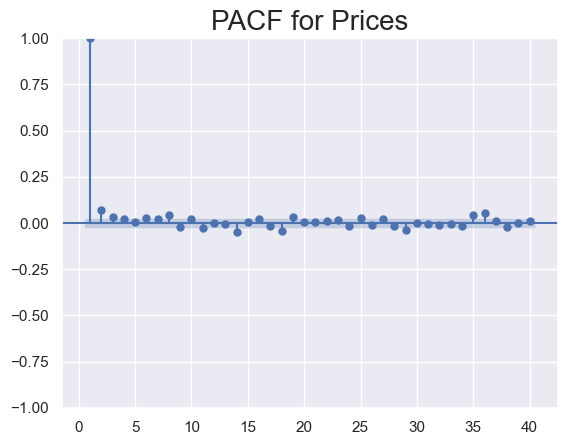

In [49]:
sgt.plot_pacf(df.market_value, lags=40, alpha = 0.05 , zero=False, method=('ols'))
plt.title("PACF for Prices", size=20)
plt.show()